In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime
import numpy as np 


In [173]:
def time_category(time):
    # time is a string
    temptime=''
    timeInt=int(time.split(':')[0])
    if timeInt>=24:
        timeInt=timeInt-24
        temptime=str(timeInt)+':'+time.split(':')[1]
        time=temptime
    
    date_time_str = time
    date_time_obj = datetime.strptime(date_time_str, '%H:%M')
    time_24=datetime.strptime('19:00', '%H:%M')
    time_5=datetime.strptime('5:00', '%H:%M')
    time_8=datetime.strptime('8:00', '%H:%M')
    time_11=datetime.strptime('11:00', '%H:%M')
    time_12=datetime.strptime('12:00', '%H:%M')
    time_15=datetime.strptime('15:00', '%H:%M')
    time_16=datetime.strptime('16:00', '%H:%M')
    time_17=datetime.strptime('17:00', '%H:%M')
    time_19=datetime.strptime('19:00', '%H:%M')
    time_21=datetime.strptime('21:00', '%H:%M')
    time_24=datetime.strptime('00:00', '%H:%M')
    pod=''
    if time_5<date_time_obj<=time_8:
        pod='Early Morning'
    if time_8<date_time_obj<=time_11:
        pod='Morning'
    if time_11<date_time_obj<=time_12:
        pod='Late Morning'
    if time_12<date_time_obj<=time_15:
        pod='Early Afternoon'
    if time_15<date_time_obj<=time_16:
        pod='Afternoon'
    if time_16<date_time_obj<=time_17:
        pod='Late Afternoon'    
    if time_17<date_time_obj<=time_19:
        pod='Early Evening'
    if time_19<date_time_obj<=time_21:
        pod='Evening'
    if time_21<date_time_obj:
        pod='Late Evening'
    if time_24<=date_time_obj<=time_5:
        pod='Mid night'
    return pod

In [41]:
 time_category('8:00')

'Early Morning'

In [174]:
def get_groups(temp,cols,interest):
    
    cols.append(interest)
    interest_Group=temp.groupby(by=cols).count()['downo']
    vals=temp.groupby(by=cols).count()['downo'].values
    group={}
    for i in range(len(interest_Group)):
        #print(temp.groupby(by=cols).count()['downo'].index[i][2], vals[i])
        group[temp.groupby(by=cols).count()['downo'].index[i][2]]=vals[i]
    return group

In [175]:
def get_avg_time_lenght(Group_time):
    avg_time_length={}
    for idx in range(len(Group_time.index)):
        group=Group_time.index[idx]
        avg_time_length[group[2]]=Group_time[idx]
    return avg_time_length

In [176]:
col=['downo', 'daytype','SubSystem','StartStn','EndStation','EntTime','EntTimeHHMM','ExTime','DFare','RouteID','FinalProduct','JourneyLength','Time_category','stations_count','stations_list','journey_dist(km)','journey_dur(hh)','journey_avgspeed(km/h)']
jr_data=pd.read_csv('Journey_Matched_Bystation_new.csv',usecols=col)

In [12]:
#jr_data=pd.read_csv('Journey_Matched_new.csv')

In [18]:
jr_data.sample(20)

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,DFare,RouteID,FinalProduct,JourneyLength,Time_category,stations_count,stations_list,journey_dist(km),journey_dur(hh),journey_avgspeed(km/h)
401297,3,Tue,LUL,sloane-square,moorgate,500,08:20,531,160,XX,PAYG,31,Morning,6,"['sloane-square', 'victoria', 'st-jamess-park'...",5.84,0.52,11.30
464958,6,Fri,LUL,ealing-broadway,victoria,551,09:11,592,270,XX,PAYG,41,Morning,10,"['ealing-broadway', 'ealing-common', 'acton-to...",11.99,0.68,17.55
175337,5,Thu,LUL,bromley-by-bow,elm-park,1151,19:11,1181,110,XX,PAYG,30,Evening,7,"['bromley-by-bow', 'west-ham', 'barking', 'upn...",14.80,0.50,29.60
64977,5,Thu,LUL,tower-hill,cannon-street,1055,17:35,1060,0,XX,LUL Travelcard-1 Month,5,Early Evening,2,"['tower-hill', 'monument', 'cannon-street']",0.95,0.08,11.40
103777,6,Fri,LUL,kings-cross-st-pancras,greenford,1084,18:04,1125,280,XX,PAYG,41,Early Evening,15,"['kings-cross-st-pancras', 'euston-square', 'g...",17.36,0.68,25.41
238511,2,Mon,LUL,notting-hill-gate,upton-park,1274,21:14,1316,220,XX,PAYG,42,Late Evening,15,"['notting-hill-gate', 'queensway', 'lancaster-...",16.56,0.70,23.66
576008,2,Mon,LUL,goldhawk-road,hammersmith-met,763,12:43,771,0,XX,LUL Travelcard-7 Day,8,Early Afternoon,1,"['goldhawk-road', 'hammersmith-met']",0.97,0.13,7.31
612360,1,Sun,LUL,wood-lane,westbourne-park,830,13:50,847,110,XX,PAYG,17,Early Afternoon,3,"['wood-lane', 'latimer-road', 'ladbroke-grove'...",2.07,0.28,7.31
30617,3,Tue,NR,fenchurch-street,limehouse,1029,17:09,1035,0,XX,LUL Travelcard-1 Month,6,Early Evening,1,"['fenchurch-street', 'limehouse']",2.71,0.10,27.13
431341,5,Thu,LUL,southgate,aldgate-east,520,08:40,577,280,XX,PAYG,57,Morning,12,"['southgate', 'arnos-grove', 'bounds-green', '...",15.31,0.95,16.12


In [19]:
test=jr_data.groupby(by=['StartStn','EndStation']).count()

In [20]:
('chesham','bellingham') in test

False

In [21]:
jr_data[(jr_data['StartStn']=='chesham') & (jr_data['EndStation']=='bellingham')] 

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,DFare,RouteID,FinalProduct,JourneyLength,Time_category,stations_count,stations_list,journey_dist(km),journey_dur(hh),journey_avgspeed(km/h)


In [22]:
list(jr_data.groupby(by='daytype').count()['downo'].index)

['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [23]:
jr_data.head()

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,DFare,RouteID,FinalProduct,JourneyLength,Time_category,stations_count,stations_list,journey_dist(km),journey_dur(hh),journey_avgspeed(km/h)
0,5,Thu,LUL,preston-road,northwood,1000,16:40,1024,0,XX,Freedom Pass (Disabled),24,Late Afternoon,6,"['preston-road', 'northwick-park', 'harrow-on-...",10.16,0.40,25.40
1,5,Thu,LUL,holborn,bounds-green,1000,16:40,1028,0,XX,LUL Travelcard-Annual,28,Late Afternoon,10,"['holborn', 'russell-square', 'kings-cross-st-...",11.29,0.47,24.19
2,1,Sun,LUL,earls-court,pimlico,1000,16:40,1021,160,XX,PAYG,21,Late Afternoon,5,"['earls-court', 'gloucester-road', 'south-kens...",4.76,0.35,13.61
3,3,Tue,LUL,victoria,bethnal-green,1000,16:40,1027,0,XX,LUL Travelcard-7 Day,27,Late Afternoon,6,"['victoria', 'st-jamess-park', 'westminster', ...",7.10,0.45,15.77
4,6,Fri,LUL/NR,walthamstow-central,arsenal,1000,16:40,1017,55,XX,PAYG,17,Late Afternoon,5,"['walthamstow-central', 'blackhorse-road', 'to...",7.62,0.28,26.89


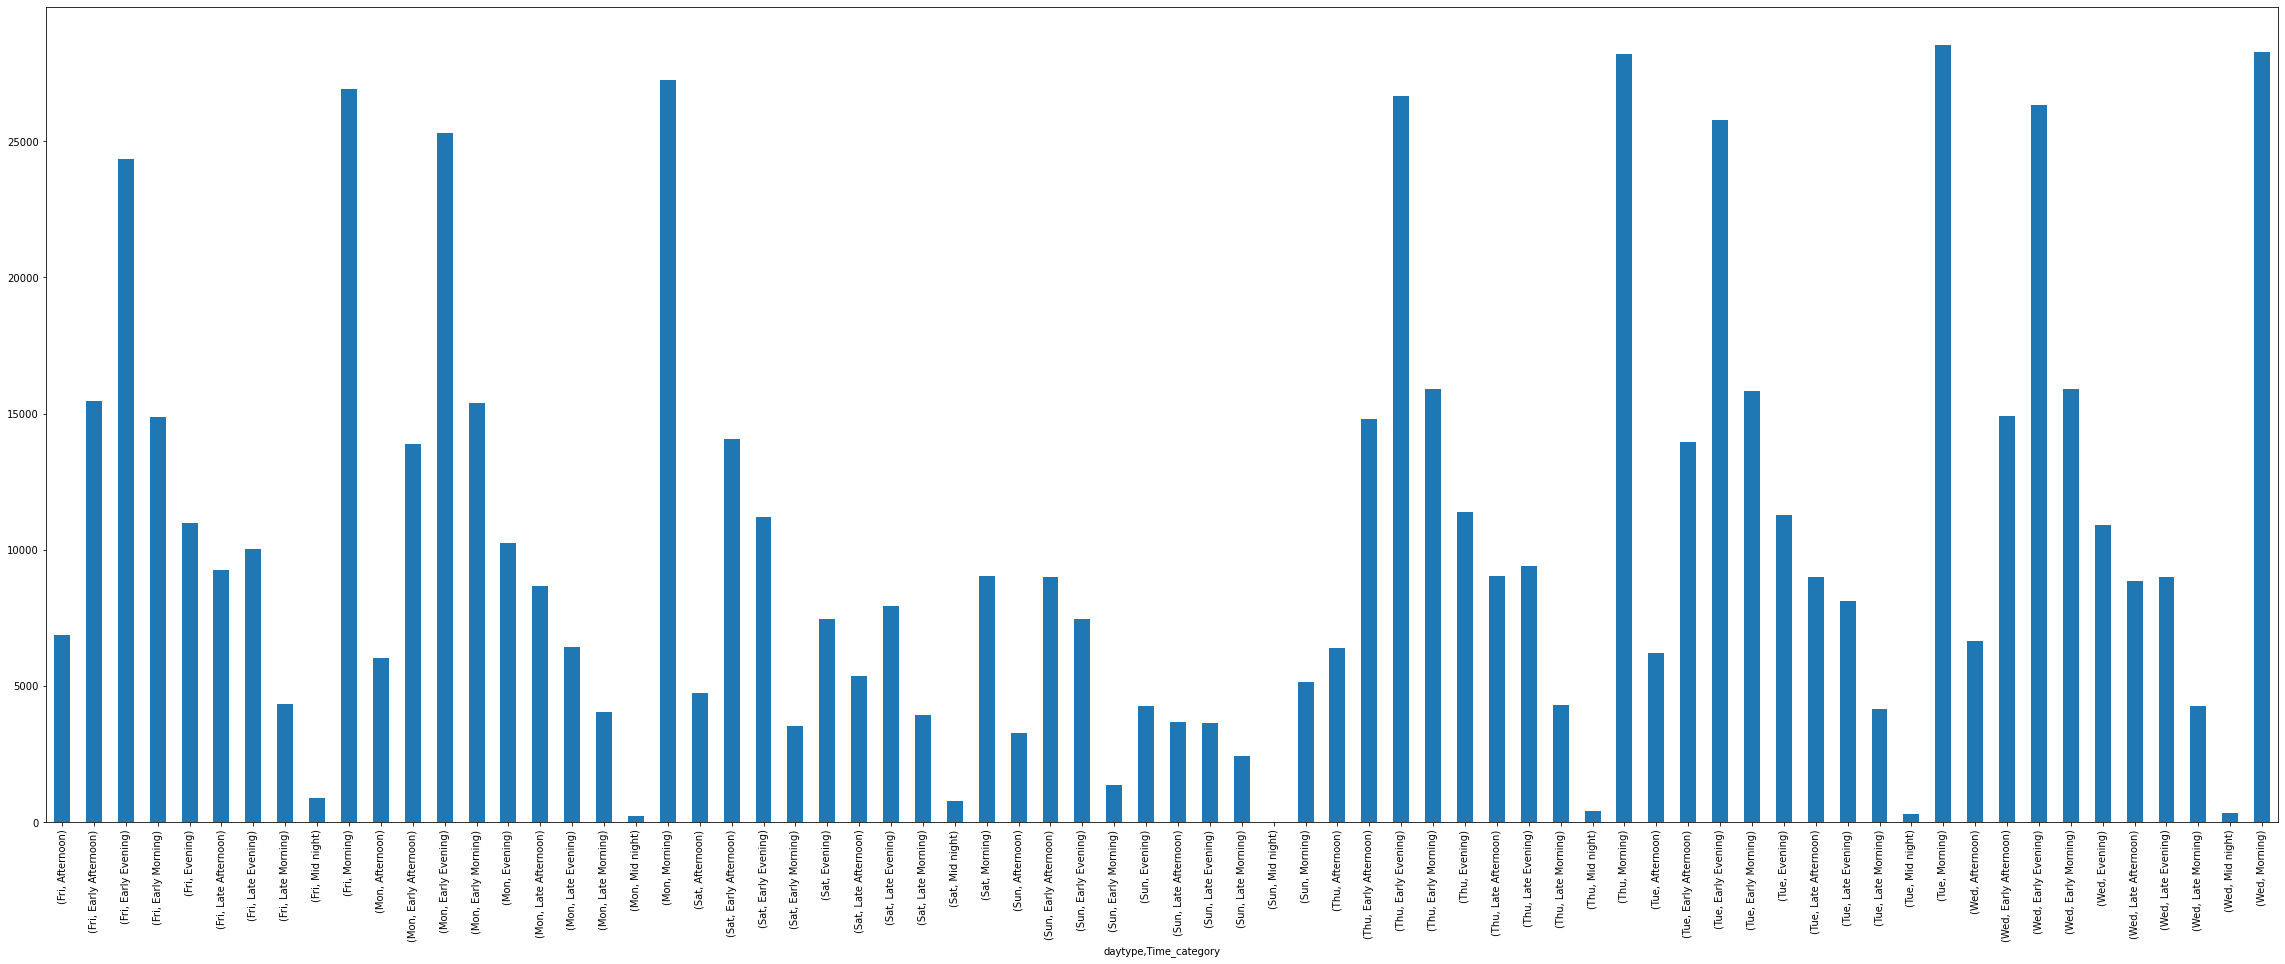

In [24]:
plt.figure(figsize=(40,15))
jr_data.groupby(by=['daytype', 'Time_category']).count()['downo'].plot(kind='bar')


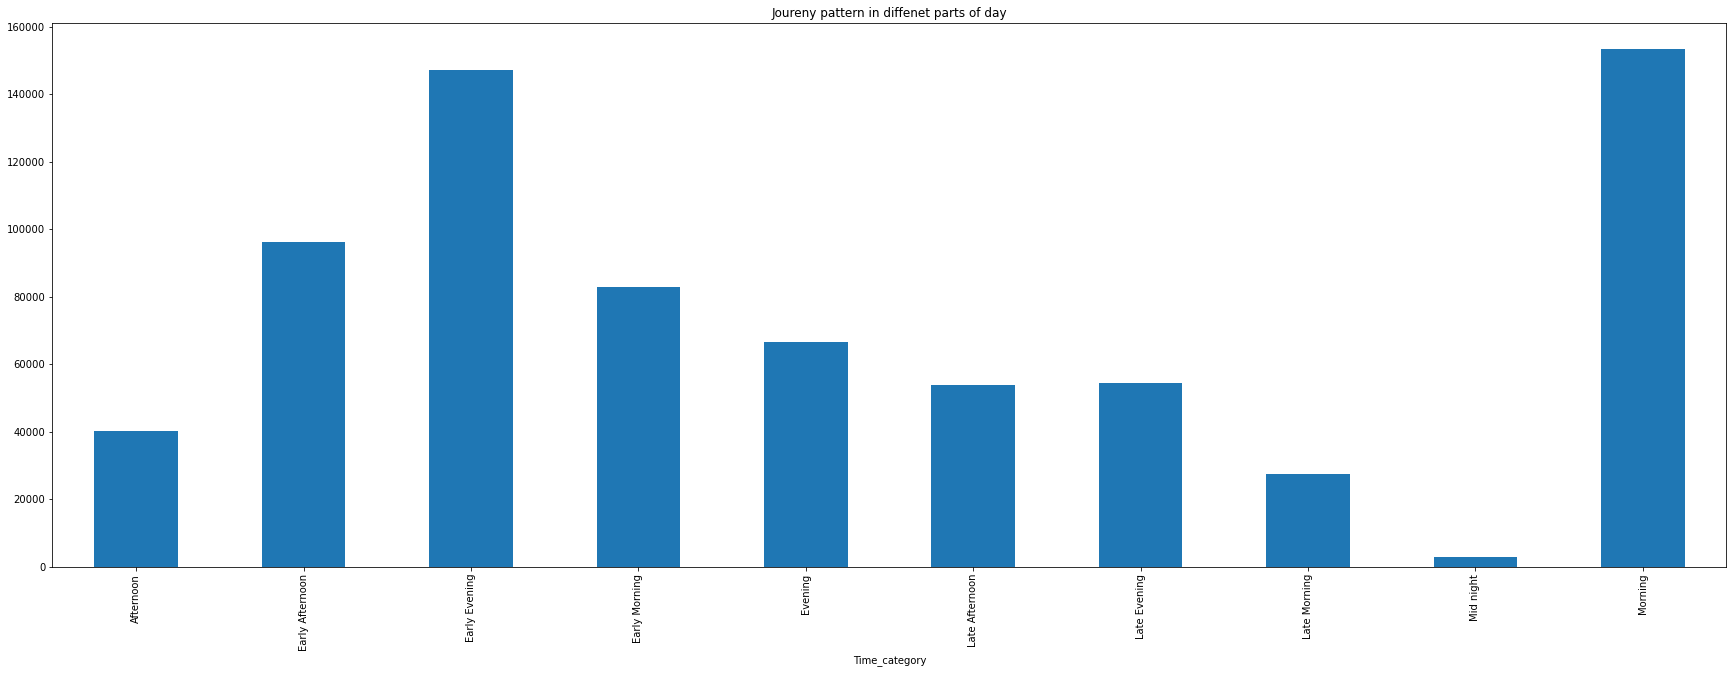

In [146]:
plt.figure(figsize=(30,10))
jr_data.groupby(by='Time_category').count()['downo'].plot(kind='bar')
plt.title('Joureny pattern in diffenet parts of day')
#plt.ylabel('The number of commuters')
plt.savefig('journeypattern.jpg')

### The following code is for testing the approach used for network creation

In [26]:
temp=jr_data[(jr_data['StartStn']=='barking') & (jr_data['EndStation']=='addington-village') ]

In [27]:
temp

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,DFare,RouteID,FinalProduct,JourneyLength,Time_category,stations_count,stations_list,journey_dist(km),journey_dur(hh),journey_avgspeed(km/h)
84157,3,Tue,NR,barking,addington-village,1069,17:49,1131,200,XX,PAYG,62,Early Evening,32,"['barking', 'west-ham', 'canning-town', 'east-...",30.85,1.03,29.86
232177,6,Fri,NR,barking,addington-village,1258,20:58,1312,220,XX,PAYG,54,Evening,32,"['barking', 'west-ham', 'canning-town', 'east-...",30.85,0.90,34.28
356746,3,Tue,NR,barking,addington-village,467,07:47,534,280,XX,PAYG,67,Early Morning,32,"['barking', 'west-ham', 'canning-town', 'east-...",30.85,1.12,27.63
514289,4,Wed,NR,barking,addington-village,633,10:33,697,220,XX,PAYG,64,Morning,32,"['barking', 'west-ham', 'canning-town', 'east-...",30.85,1.07,28.93
523615,2,Mon,NR,barking,addington-village,654,10:54,728,220,XX,PAYG,74,Morning,32,"['barking', 'west-ham', 'canning-town', 'east-...",30.85,1.23,25.02


In [28]:
len(temp)

5

In [29]:
temp['SubSystem'].unique()[0]

'NR'

In [30]:
res=temp.groupby(by=['StartStn','EndStation']).mean()

In [31]:
res

,,downo,EntTime,ExTime,DFare,JourneyLength,stations_count,journey_dist(km),journey_dur(hh),journey_avgspeed(km/h)
StartStn,EndStation,,,,,,,,,
barking,addington-village,3.6,816.2,880.4,228.0,64.2,32.0,30.85,1.07,29.144


In [32]:
res['JourneyLength'][0]

64.2

In [33]:
Group_time=temp.groupby(by=['StartStn','EndStation','Time_category'])['JourneyLength'].mean()

In [34]:
Group_time

StartStn  EndStation         Time_category
barking   addington-village  Early Evening    62
                             Early Morning    67
                             Evening          54
                             Morning          69
Name: JourneyLength, dtype: int64

In [35]:
get_avg_time_lenght(Group_time)

{'Early Evening': 62, 'Early Morning': 67, 'Evening': 54, 'Morning': 69}

In [36]:
FinalProduct_dist=get_groups(temp,['StartStn','EndStation'],'FinalProduct')

In [37]:
FinalProduct_dist

{'PAYG': 5}

In [38]:
Time_category_dist=get_groups(temp,['StartStn','EndStation'],'Time_category')

In [39]:
day_dist=get_groups(temp,['StartStn','EndStation'],'daytype')

## Network Creation Code

In [42]:
p=jr_data.groupby(by=['StartStn','EndStation']).groups
stations=list(p.keys())
Transportation_Network=nx.DiGraph()
for stat in stations:
    stat=list(stat)
    temp=jr_data[(jr_data['StartStn']==stat[0]) & (jr_data['EndStation']==stat[1])]
    Group_time=temp.groupby(by=['StartStn','EndStation','Time_category'])['JourneyLength'].mean()
    avg_length_per_time=get_avg_time_lenght(Group_time)
    res=temp.groupby(by=['StartStn','EndStation']).mean()
    trip_no=len(temp)
    subsystem=temp['SubSystem'].unique()[0]
    jr_length=float(res['JourneyLength'][0])
    jr_dist=float(res['journey_dist(km)'][0])
    jr_stations_count=int(res['stations_count'][0])
    jr_avgspeed=float(res['journey_avgspeed(km/h)'][0])
    FinalProduct_dist=get_groups(temp,['StartStn','EndStation'],'FinalProduct')
    Time_category_dist=get_groups(temp,['StartStn','EndStation'],'Time_category')
    day_dist=get_groups(temp,['StartStn','EndStation'],'daytype')
    Transportation_Network.add_edge(stat[0],stat[1],subsystem=subsystem,trip_no=trip_no,length=jr_length, 
                                    dist=jr_dist,st_count=jr_stations_count,avgspeed=jr_avgspeed,
                                    avg_length_per_time=avg_length_per_time,FD=FinalProduct_dist,TD=Time_category_dist,
                                    DD=day_dist)

In [43]:
Transportation_Network['barking']

AtlasView({'addington-village': {'subsystem': 'NR', 'trip_no': 2, 'length': 58.0, 'dist': 30.85, 'st_count': 32, 'avgspeed': 32.07, 'avg_length_per_time': {'Early Evening': 62, 'Evening': 54}, 'FD': {'PAYG': 2}, 'TD': {'Early Evening': 1, 'Evening': 1}, 'DD': {'Fri': 1, 'Tue': 1}}, 'aldgate-east': {'subsystem': 'LUL', 'trip_no': 1, 'length': 28.0, 'dist': 11.15, 'st_count': 7, 'avgspeed': 23.9, 'avg_length_per_time': {'Late Evening': 28}, 'FD': {'PAYG': 1}, 'TD': {'Late Evening': 1}, 'DD': {'Mon': 1}}, 'angel': {'subsystem': 'LUL', 'trip_no': 2, 'length': 44.5, 'dist': 14.45, 'st_count': 10, 'avgspeed': 19.490000000000002, 'avg_length_per_time': {'Early Evening': 44.5}, 'FD': {'PAYG': 2}, 'TD': {'Early Evening': 2}, 'DD': {'Tue': 1, 'Wed': 1}}, 'archway': {'subsystem': 'LUL', 'trip_no': 1, 'length': 69.0, 'dist': 19.27, 'st_count': 12, 'avgspeed': 16.76, 'avg_length_per_time': {'Early Evening': 69}, 'FD': {'LUL Travelcard-1 Month': 1}, 'TD': {'Early Evening': 1}, 'DD': {'Thu': 1}}, 'ba

In [92]:
Transportation_Network.is_directed()

True

In [43]:
print( 'Network Reciprocity:' ,nx.reciprocity(Transportation_Network))

Network Reciprocity: 0.8481802426343155


In [44]:
print( 'The number of nodes of Original Network:', len(Transportation_Network.nodes()))
print( 'The number of edge of Original Network:', len(Transportation_Network.edges()))
print('The Reciprocity of Original Network:', nx.reciprocity(Transportation_Network))

The number of nodes of Original Network: 414
The number of edge of Original Network: 51930
The Reciprocity of Original Network: 0.8481802426343155


## Setting the latitude and longitude of the stations

In [45]:
stationPosition=pd.read_csv('London_stations_matched.csv', index_col='Station')

In [46]:
stationPosition.head()

,OS X,OS Y,Latitude,Longitude,Zone,Postcode
Station,,,,,,
abbey-road,539081,183352,51.531952,0.003723,3,E15 3NB
abbey-wood,547297,179002,51.490784,0.120272,4,SE2 9RH
acton-central,520613,180299,51.508758,-0.263430,2,W3 6BH
acton-main-line,520296,181196,51.516887,-0.267690,3,W3 9EH
acton-town,519457,179639,51.503071,-0.280303,3,W3 8HN


In [47]:
stationPosition.loc['acton-main-line']['Latitude']

51.5168869310483

In [48]:
nodes={}
for i in Transportation_Network:
    positions={'latitude':0,"longitude":0}
    positions['latitude']=stationPosition.loc[i]['Latitude']
    positions['longitude']=stationPosition.loc[i]['Longitude']
    nodes[i]=positions


In [49]:
for node in nodes:
    Transportation_Network.nodes[node]['latitude'] = nodes[node]['latitude']
    Transportation_Network.nodes[node]['longitude'] = nodes[node]['longitude']

In [50]:
Transportation_Network.nodes.data()['acton-main-line']

{'latitude': 51.5168869310483, 'longitude': -0.267689952184077}

In [51]:
Transportation_Network['acton-main-line']

AtlasView({'addington-village': {'subsystem': 'NR', 'trip_no': 8, 'length': 14.25, 'dist': 30.34, 'st_count': 14, 'avgspeed': 134.20624999999998, 'avg_length_per_time': {'Early Afternoon': 14.0, 'Early Morning': 14.0, 'Morning': 14.4}, 'FD': {'PAYG': 8}, 'TD': {'Early Afternoon': 1, 'Early Morning': 2, 'Morning': 5}, 'DD': {'Mon': 2, 'Sat': 1, 'Thu': 1, 'Tue': 2, 'Wed': 2}}, 'angel': {'subsystem': 'LUL/NR', 'trip_no': 1, 'length': 77.0, 'dist': 11.74, 'st_count': 7, 'avgspeed': 9.15, 'avg_length_per_time': {'Early Afternoon': 77}, 'FD': {'PAYG': 1}, 'TD': {'Early Afternoon': 1}, 'DD': {'Tue': 1}}, 'barbican': {'subsystem': 'LUL/NR', 'trip_no': 1, 'length': 40.0, 'dist': 11.86, 'st_count': 5, 'avgspeed': 17.79, 'avg_length_per_time': {'Late Afternoon': 40}, 'FD': {'PAYG': 1}, 'TD': {'Late Afternoon': 1}, 'DD': {'Thu': 1}}, 'castle-bar-park': {'subsystem': 'NR', 'trip_no': 1, 'length': 19.0, 'dist': 5.14, 'st_count': 4, 'avgspeed': 16.23, 'avg_length_per_time': {'Early Afternoon': 19}, '

In [52]:
nx.write_gexf(Transportation_Network, "Transportation_Network_position.gexf")

#### Saving the network using Pickle

In [53]:
import pickle
  
with open('Transportation_Network.directed', 'wb') as network_file:
    pickle.dump(Transportation_Network, network_file)

#### Loading the network using Pickle

In [29]:
import pickle
with open('Transportation_Network.directed', 'rb') as network_file:
 
    Transportation_Network = pickle.load(network_file)
 
    # After config_dictionary is read from file
    #print(config_dictionary)

In [ ]:
#loaded network
Transportation_Network_loaded['acton-central']['barking']['trip_no']

In [30]:
Transportation_Network['acton-central']['barking']['trip_no']

1

In [271]:
distance(G, 'golders-green','knightsbridge',weight='avgspeed')

(10.580365200843065,
 ['golders-green',
  'hampstead',
  'belsize-park',
  'chalk-farm',
  'camden-town',
  'euston',
  'warren-street',
  'oxford-circus',
  'green-park',
  'hyde-park-corner',
  'knightsbridge'])

## K_core for Org_Network

In [54]:
Transportation_Network_undirected=Transportation_Network.to_undirected(reciprocal=True)

In [55]:
degree_sequence = sorted([d for n, d in Transportation_Network_undirected.degree()], reverse=True)
dmax = max(degree_sequence)

In [56]:
dmax

309

In [ ]:
nx.write_gexf(Transportation_Network_undirected, "Transportation_Network_Undirected.gexf")

In [ ]:
set(Transportation_Network_undirected.nodes())-set(core_dict)

In [ ]:
len(core_dict)

## Computing Stress

### Network G

In [72]:
import networkx as nx
import csv

file  = open('tube_matched.csv', "r", encoding='utf8')
a=file.readlines()
G=nx.Graph()
for i in a[1:]:
    i=i[:-1]
    i=i.split(',')
    #print(i)
    G.add_edge(i[2],i[3],weight=float(i[4]))

In [73]:
G['baker-street']['regents-park']['weight']

0.8035911111386282

In [74]:
print( 'The number of nodes of Physical Network:', len(G.nodes()))
print( 'The number of edge of Physical Network:', len(G.edges()))
print('The Reciprocity of Physical Network:', nx.reciprocity(G))

The number of nodes of Physical Network: 651
The number of edge of Physical Network: 807
The Reciprocity of Physical Network: 0.0


In [75]:
def distance(G, source,target,weight):
    path=nx.shortest_path(G, source=source,target =target, weight=weight)
    distance=0
    for idx in range(len(path)-1):
        source=path[idx]
        target=path[idx+1]
        distance+=G[source][target]['weight']
    return distance,path

In [76]:
distance(G,'preston-road','northwood','weight')

(10.159208526358956,
 ['preston-road',
  'northwick-park',
  'harrow-on-the-hill',
  'north-harrow',
  'pinner',
  'northwood-hills',
  'northwood'])

### Computing Stress

In [77]:
#Computing stress (crowdedness)
station_stress={}
c=0
for node in Transportation_Network:
    for neighbor in Transportation_Network[node]:
        #print(node)
        #print(neighbor)
        #station_stress[node]+=G[node][neighbor]['trip_no']
        try:
            _,path=distance(G,node,neighbor,'weight')
            #print(path)
            for node_in_between in path:
                if node_in_between not in station_stress:
                    #stationPosition.loc[i]['Latitude']
                    #stationPosition.loc[i]['Longitude']
                    #print('node',node)
                    #print('neighb',neighbor)
                    #print('between',node_in_between)
                    station_stress[node_in_between]={'strees':0, 'latitude':0, 'longitude':0 }
                    station_stress[node_in_between]['strees']=Transportation_Network[node][neighbor]['trip_no']
                    station_stress[node_in_between]['latitude']=stationPosition.loc[node_in_between]['Latitude']
                    station_stress[node_in_between]['longitude']=stationPosition.loc[node_in_between]['Longitude']
                else:
                    #print('between',node_in_between)
                    station_stress[node_in_between]['strees']+=Transportation_Network[node][neighbor]['trip_no']
                
        except:
            continue
            #c=c+1
            #print(node,neighbor)

In [78]:
print('The number of journeys whose stations are not conneted by rail way in at least one direction is ' ,c)

The number of journeys whose stations are not conneted by rail way in at least one direction is  0


In [79]:
 station_stress['acton-central']

{'strees': 2231, 'latitude': 51.5087577801896, 'longitude': -0.263430199363473}

In [80]:
Transportation_Network['acton-central']['turnpike-lane']

{'subsystem': 'LUL/NR/LRC',
 'trip_no': 2,
 'length': 51.5,
 'dist': 19.2,
 'st_count': 13,
 'avgspeed': 22.47,
 'avg_length_per_time': {'Early Afternoon': 55, 'Evening': 48},
 'FD': {'PAYG': 2},
 'TD': {'Early Afternoon': 1, 'Evening': 1},
 'DD': {'Thu': 1, 'Tue': 1}}

In [81]:
station_stress

{'acton-central': {'strees': 2231,
  'latitude': 51.5087577801896,
  'longitude': -0.263430199363473},
 'willesden-junction': {'strees': 9016,
  'latitude': 51.5322339634936,
  'longitude': -0.24390914329748295},
 'kensal-green': {'strees': 6209,
  'latitude': 51.530524214157886,
  'longitude': -0.224713384073025},
 'queens-park': {'strees': 9314,
  'latitude': 51.534312650570094,
  'longitude': -0.20479814938675694},
 'kilburn-park': {'strees': 8960,
  'latitude': 51.535135536904896,
  'longitude': -0.193966057123936},
 'maida-vale': {'strees': 10762,
  'latitude': 51.5299950567181,
  'longitude': -0.18543264693135394},
 'warwick-avenue': {'strees': 13480,
  'latitude': 51.523104435131906,
  'longitude': -0.18295329305572},
 'paddington': {'strees': 70452,
  'latitude': 51.5153937854761,
  'longitude': -0.17573675205718},
 'edgware-road-circledistricthammersmith-and-city': {'strees': 15942,
  'latitude': 51.5199980431141,
  'longitude': -0.16766825428113402},
 'baker-street': {'strees

In [82]:
# Storing strees
file=open('Station_strees.csv','w')
file.write('station,stress,latitude,longitude\n')
for node in station_stress:
    file.write(node+','+str(station_stress[node]['strees'])+','+str(station_stress[node]['latitude'])+','+str(station_stress[node]['longitude'])+'\n')
file.close()   

In [83]:
output=pd.read_csv('Station_strees.csv')

In [84]:
output.sample(15)

,station,stress,latitude,longitude
184,redbridge,11726,51.576367,0.045394
412,hoxton,115,51.531392,-0.075586
101,leicester-square,54685,51.511291,-0.128242
373,leytonstone-high-road,962,51.563807,0.008254
74,great-portland-street,34916,51.523789,-0.143961
404,hatch-end,673,51.609829,-0.369179
17,stepney-green,34929,51.521996,-0.047383
23,south-acton,1788,51.499686,-0.270215
304,moorgate,33956,51.518437,-0.089018
232,northwood,3304,51.611214,-0.423838


In [85]:
import numpy as np

In [86]:
np.max(output['stress'])

117876

In [87]:
np.min(output['stress'])

1

In [88]:
stress_death=pd.read_csv('stress_death.csv',index_col='station')
stress_death.drop('Unnamed: 0',axis=1,inplace=True)

In [89]:
stress_death.head()

,stress,latitude,longitude,geometry,covid_19_deaths_per_thousand
station,,,,,
acton-central,859,51.508758,-0.263430,POINT (-0.263430199363473 51.5087577801896),0.376553
willesden-junction,3657,51.532234,-0.243909,POINT (-0.2439091432974829 51.5322339634936),0.210504
kensal-green,2578,51.530524,-0.224713,POINT (-0.224713384073025 51.53052421415789),0.225327
queens-park,3900,51.534313,-0.204798,POINT (-0.2047981493867569 51.53431265057009),0.467344
kilburn-high-road,1016,51.537268,-0.191113,POINT (-0.19111310573361 51.5372677411075),0.135722


In [90]:
stress_death.loc['acton-central']['longitude']

-0.263430199363473

In [91]:
stress_death.loc['acton-central']['covid_19_deaths_per_thousand']

0.37655328200000004

### Create a full network (Dynamic) with all characteristics 

In [92]:
##Stress csv file that has information about covid death cases must be already calculated 
#Network G that has all distances must be already calculated 

all_finalProduct=list(jr_data.groupby(by='FinalProduct').count()['downo'].index)
#all_time_parts=list(jr_data.groupby(by='Time_category').count()['downo'].index)
#print(all_time_parts)
all_day=list(jr_data.groupby(by='daytype').count()['downo'].index)
part_day=['Early Morning','Morning','Late Morning','Early Afternoon','Afternoon','Late Afternoon','Early Evening','Evening','Late Evening','Mid night']
all_time_parts=part_day
Full_Transportation_Network=nx.DiGraph()
for node in Transportation_Network:
    for neighbor in Transportation_Network[node]:
        try:
            _,path=distance(G,node,neighbor,'weight')
            #print(path)
            for idx in range(len(path)-1):
                node_from=path[idx]
                node_to=path[idx+1]
                if (node_from,node_to) not in Full_Transportation_Network.edges:
                    trip_no=Transportation_Network[node][neighbor]['trip_no']
                    subsystem=Transportation_Network[node][neighbor]['subsystem']
                    full_jr_time=float(Transportation_Network[node][neighbor]['length'])
                    jr_length=full_jr_time/(len(path)-1)
                    jr_dist=float(G[node_from][node_to]['weight'])
                    #r_stations_count=1
                    Covid_weight=stress_death.loc[node_to]['covid_19_deaths_per_thousand']
                    jr_avgspeed=float(Transportation_Network[node][neighbor]['avgspeed']/(len(path)-1))

                    Full_Transportation_Network.add_edge(node_from,node_to,subsystem=subsystem,trip_no=trip_no,
                                                    Covid_weight=Covid_weight,length=jr_length, dist=jr_dist,avgspeed=jr_avgspeed)                

                    # Final Product
                    FinalProduct_dist=Transportation_Network[node][neighbor]['FD']
                    for FP in all_finalProduct:
                        Full_Transportation_Network[node_from][node_to]['FP_'+FP]=FinalProduct_dist.get(FP,0)

                    # Stress per parts of time Category  
                    Time_category_dist=Transportation_Network[node][neighbor]['TD']
                    for partday in part_day:
                        Full_Transportation_Network[node_from][node_to]['Stress_'+partday]=0
                    for TD in all_time_parts:
                        Full_Transportation_Network[node_from][node_to]['Stress_'+TD]=Time_category_dist.get(TD,0)

                    # Average Journey Time per parts of time Category     
                    avg_length_per_time=Transportation_Network[node][neighbor]['avg_length_per_time']
                    for partday in part_day:
                        Full_Transportation_Network[node_from][node_to]['Avglength_'+partday]=0
                    for TD in all_time_parts:
                        Full_Transportation_Network[node_from][node_to]['Avglength_'+TD]=avg_length_per_time.get(TD,full_jr_time)/(len(path)-1)

                    # Stress per days of the week
                    day_dist=Transportation_Network[node][neighbor]['DD']
                    for day in all_day:
                        Full_Transportation_Network[node_from][node_to]['DayStress_'+day]=day_dist.get(day,0)


                    '''
                    station_stress[node_in_between]={'strees':0, 'latitude':0, 'longitude':0 }
                    station_stress[node_in_between]['strees']=Transportation_Network[node][neighbor]['trip_no']
                    station_stress[node_in_between]['latitude']=stationPosition.loc[node_in_between]['Latitude']
                    station_stress[node_in_between]['longitude']=stationPosition.loc[node_in_between]['Longitude']
                    '''
                else:
                    full_jr_time=float(Transportation_Network[node][neighbor]['length'])
                    jr_length=full_jr_time/(len(path)-1)
                    #print(node_from)
                    #print(node_to)
                    Full_Transportation_Network[node_from][node_to]['trip_no']+=Transportation_Network[node][neighbor]['trip_no']
                    # add subsystems
                    sbsystems=list(Full_Transportation_Network[node_from][node_to]['subsystem'])+[Transportation_Network[node][neighbor]['subsystem']]
                    Full_Transportation_Network[node_from][node_to]['subsystem']=set(sbsystems)
                    # length update
                    updated_lenght=(Full_Transportation_Network[node_from][node_to]['length']+
                                    float(Transportation_Network[node][neighbor]['length']/(len(path)-1)))/2
                    Full_Transportation_Network[node_from][node_to]['length']=updated_lenght
                    #update average speed
                    updated_avg=(Full_Transportation_Network[node_from][node_to]['avgspeed']
                     +float(Transportation_Network[node][neighbor]['avgspeed']/(len(path)-1)))/2
                    Full_Transportation_Network[node_from][node_to]['avgspeed']=updated_avg


                    # update findal products
                    FinalProduct_dist=Transportation_Network[node][neighbor]['FD']
                    for FP in all_finalProduct:
                        Full_Transportation_Network[node_from][node_to]['FP_'+FP]+=FinalProduct_dist.get(FP,0)

                    # Stress per parts of time Category  
                    Time_category_dist=Transportation_Network[node][neighbor]['TD']
                    for TD in all_time_parts:
                        Full_Transportation_Network[node_from][node_to]['Stress_'+TD]+=Time_category_dist.get(TD,0)

                    # Average Journey Time per parts of time Category     
                    avg_length_per_time=Transportation_Network[node][neighbor]['avg_length_per_time']
                    for TD in all_time_parts:
                        Full_Transportation_Network[node_from][node_to]['Avglength_'+TD]=(Full_Transportation_Network[node_from][node_to]['Avglength_'+TD]+(avg_length_per_time.get(TD,full_jr_time)/(len(path)-1)))/2

                    # Stress per days of the week
                    day_dist=Transportation_Network[node][neighbor]['DD']
                    for day in all_day:
                        Full_Transportation_Network[node_from][node_to]['DayStress_'+day]+=day_dist.get(day,0)
        except:
            continue
# the rest of the code is in the next cell                

In [93]:
# the following code is to add Covid_stress_Lenght Function and setting latitude and longitude
for edge in list(Full_Transportation_Network.edges):
    node_from=edge[0]
    node_to=edge[1]
    for time in all_time_parts:
        length=Full_Transportation_Network[node_from][node_to]['Avglength_'+time]
        if length==0:
            Full_Transportation_Network[node_from][node_to]['Avglength_'+time]=Full_Transportation_Network[node_from][node_to]['length']
            length=Full_Transportation_Network[node_from][node_to]['Avglength_'+time]
        if Full_Transportation_Network[node_from][node_to]['Stress_'+time]==0:
            Full_Transportation_Network[node_from][node_to]['Stress_'+time]=Full_Transportation_Network[node_from][node_to]['trip_no']/10
        Stress=Full_Transportation_Network[node_from][node_to]['Stress_'+time]
        Covid_weight=Full_Transportation_Network[node_from][node_to]['Covid_weight']
        Covid_risk=Stress*Covid_weight
        Full_Transportation_Network[node_from][node_to]['Covid_risk_'+time]=Covid_risk
        Full_Transportation_Network[node_from][node_to]['risk_lenght_'+time]=length*Covid_risk
nodes={}
for i in Full_Transportation_Network:
    positions={'latitude':0,"longitude":0}
    positions['latitude']=stationPosition.loc[i]['Latitude']
    positions['longitude']=stationPosition.loc[i]['Longitude']
    nodes[i]=positions
for node in nodes:
    Full_Transportation_Network.nodes[node]['latitude'] = nodes[node]['latitude']
    Full_Transportation_Network.nodes[node]['longitude'] = nodes[node]['longitude']

In [94]:
Transportation_Network.nodes.data()['acton-main-line']

{'latitude': 51.5168869310483, 'longitude': -0.267689952184077}

In [95]:
Full_Transportation_Network['harlesden']

AtlasView({'stonebridge-park': {'subsystem': {'LUL', 'L', 'LUL/NR/LRC', 'NR/LRC', 'LUL/LRC', 'LRC', 'LUL/NR', 'NR', 'C', 'R'}, 'trip_no': 2348, 'Covid_weight': 0.960768615, 'length': 4.517035484396376, 'dist': 1.5077270180215843, 'avgspeed': 3.031404639690373, 'FP_Freedom Pass (Disabled)': 48, 'FP_Freedom Pass (Elderly)': 137, 'FP_LUL Travelcard-1 Month': 271, 'FP_LUL Travelcard-7 Day': 578, 'FP_LUL Travelcard-Annual': 49, 'FP_LUL Travelcard-Period': 1, 'FP_LUL Travelcard-Time Not Captured': 0, 'FP_PAYG': 1240, 'FP_Staff Pass - Bus Operator': 5, 'FP_Staff Pass - Bus Operator Nominee': 7, 'FP_Staff Pass - Staff Nominee': 11, 'FP_Staff Pass - Staff Retired including LCB': 0, 'FP_Tfl Travel - Free': 1, 'Stress_Early Morning': 214, 'Stress_Morning': 311, 'Stress_Late Morning': 67, 'Stress_Early Afternoon': 318, 'Stress_Afternoon': 170, 'Stress_Late Afternoon': 268, 'Stress_Early Evening': 625, 'Stress_Evening': 221, 'Stress_Late Evening': 150, 'Stress_Mid night': 4, 'Avglength_Early Mornin

In [96]:
Full_Transportation_Network['harlesden']['stonebridge-park']['Avglength_Early Morning']

4.562414683971336

In [97]:
Full_Transportation_Network['willesden-junction']

AtlasView({'kensal-green': {'subsystem': {'U', 'L', 'DLR', 'NR/DLR', 'LUL', 'N', 'LUL/NR/LRC', '/', 'NR/LRC', 'LUL/LRC', 'NR', 'C', 'LRC', 'LUL/NR', 'R'}, 'trip_no': 2517, 'Covid_weight': 0.22532672399999998, 'length': 3.8337558135769703, 'dist': 1.3417866333144557, 'avgspeed': 2.2138585508903863, 'FP_Freedom Pass (Disabled)': 49, 'FP_Freedom Pass (Elderly)': 106, 'FP_LUL Travelcard-1 Month': 304, 'FP_LUL Travelcard-7 Day': 639, 'FP_LUL Travelcard-Annual': 70, 'FP_LUL Travelcard-Period': 9, 'FP_LUL Travelcard-Time Not Captured': 0, 'FP_PAYG': 1303, 'FP_Staff Pass - Bus Operator': 2, 'FP_Staff Pass - Bus Operator Nominee': 19, 'FP_Staff Pass - Staff Nominee': 12, 'FP_Staff Pass - Staff Retired including LCB': 4, 'FP_Tfl Travel - Free': 0, 'Stress_Early Morning': 477, 'Stress_Morning': 651, 'Stress_Late Morning': 111, 'Stress_Early Afternoon': 295, 'Stress_Afternoon': 146, 'Stress_Late Afternoon': 177, 'Stress_Early Evening': 428, 'Stress_Evening': 149, 'Stress_Late Evening': 80, 'Stress

In [98]:
print( 'Network Reciprocity:' ,nx.reciprocity(Full_Transportation_Network))

Network Reciprocity: 0.99185667752443


In [99]:
print( 'The number of the node:', len(Full_Transportation_Network.nodes()))

The number of the node: 481


In [100]:
print( 'The number of the edges:', len(Full_Transportation_Network.edges()))

The number of the edges: 1228


In [101]:
print( 'Is the network directed?', Full_Transportation_Network.is_directed())

Is the network directed? True


In [102]:
print( 'Is the network multigraph?', Full_Transportation_Network.is_multigraph())

Is the network multigraph? False


In [103]:
Full_Transportation_Network.nodes()

NodeView(('acton-central', 'willesden-junction', 'kensal-green', 'queens-park', 'kilburn-park', 'maida-vale', 'warwick-avenue', 'paddington', 'edgware-road-circledistricthammersmith-and-city', 'baker-street', 'kilburn-high-road', 'south-hampstead', 'euston', 'kings-cross-st-pancras', 'farringdon', 'liverpool-street', 'whitechapel', 'stepney-green', 'mile-end', 'bow-road', 'bromley-by-bow', 'west-ham', 'barking', 'south-acton', 'gunnersbury', 'turnham-green', 'hammersmith-district', 'barons-court', 'bethnal-green', 'kensal-rise', 'brondesbury-park', 'brondesbury', 'west-hampstead', 'finchley-road-and-frognal', 'hampstead-heath', 'gospel-oak', 'upper-holloway', 'crouch-hill', 'harringay-green-lanes', 'south-tottenham', 'blackhorse-road', 'bond-street', 'earls-court', 'gloucester-road', 'south-kensington', 'sloane-square', 'victoria', 'st-jamess-park', 'westminster', 'waterloo', 'lambeth-north', 'elephant-and-castle', 'borough', 'harlesden', 'stonebridge-park', 'wembley-central', 'harrow-

In [104]:
Full_Transportation_Network['willesden-junction']['kensal-green']

{'subsystem': {'/',
  'C',
  'DLR',
  'L',
  'LRC',
  'LUL',
  'LUL/LRC',
  'LUL/NR',
  'LUL/NR/LRC',
  'N',
  'NR',
  'NR/DLR',
  'NR/LRC',
  'R',
  'U'},
 'trip_no': 2517,
 'Covid_weight': 0.22532672399999998,
 'length': 3.8337558135769703,
 'dist': 1.3417866333144557,
 'avgspeed': 2.2138585508903863,
 'FP_Freedom Pass (Disabled)': 49,
 'FP_Freedom Pass (Elderly)': 106,
 'FP_LUL Travelcard-1 Month': 304,
 'FP_LUL Travelcard-7 Day': 639,
 'FP_LUL Travelcard-Annual': 70,
 'FP_LUL Travelcard-Period': 9,
 'FP_LUL Travelcard-Time Not Captured': 0,
 'FP_PAYG': 1303,
 'FP_Staff Pass - Bus Operator': 2,
 'FP_Staff Pass - Bus Operator Nominee': 19,
 'FP_Staff Pass - Staff Nominee': 12,
 'FP_Staff Pass - Staff Retired including LCB': 4,
 'FP_Tfl Travel - Free': 0,
 'Stress_Early Morning': 477,
 'Stress_Morning': 651,
 'Stress_Late Morning': 111,
 'Stress_Early Afternoon': 295,
 'Stress_Afternoon': 146,
 'Stress_Late Afternoon': 177,
 'Stress_Early Evening': 428,
 'Stress_Evening': 149,
 'Stres

In [105]:
Full_Transportation_Network['acton-central']['willesden-junction']

{'subsystem': {'/',
  'C',
  'DLR',
  'L',
  'LRC',
  'LUL',
  'LUL/LRC',
  'LUL/NR',
  'LUL/NR/LRC',
  'N',
  'NR',
  'NR/LRC',
  'R',
  'U'},
 'trip_no': 1034,
 'Covid_weight': 0.210504157,
 'length': 5.467645370691315,
 'dist': 2.9400739059829983,
 'avgspeed': 3.024198033817558,
 'FP_Freedom Pass (Disabled)': 19,
 'FP_Freedom Pass (Elderly)': 52,
 'FP_LUL Travelcard-1 Month': 149,
 'FP_LUL Travelcard-7 Day': 266,
 'FP_LUL Travelcard-Annual': 44,
 'FP_LUL Travelcard-Period': 11,
 'FP_LUL Travelcard-Time Not Captured': 0,
 'FP_PAYG': 489,
 'FP_Staff Pass - Bus Operator': 0,
 'FP_Staff Pass - Bus Operator Nominee': 4,
 'FP_Staff Pass - Staff Nominee': 0,
 'FP_Staff Pass - Staff Retired including LCB': 0,
 'FP_Tfl Travel - Free': 0,
 'Stress_Early Morning': 181,
 'Stress_Morning': 183,
 'Stress_Late Morning': 27,
 'Stress_Early Afternoon': 120,
 'Stress_Afternoon': 67,
 'Stress_Late Afternoon': 84,
 'Stress_Early Evening': 238,
 'Stress_Evening': 91,
 'Stress_Late Evening': 43,
 'Stress

#### Saving Network using Pickle

In [222]:
import pickle
  
with open('Full_Transportation_Network.directed', 'wb') as network_file:
    pickle.dump(Full_Transportation_Network, network_file)

#### Saving Network using Pickle

In [256]:
import pickle
with open('new Full_Transportation_Network.directed', 'rb') as network_file:
 
    Full_Transportation_Network = pickle.load(network_file)
 
    # After config_dictionary is read from file
    #print(config_dictionary)

## Network Characteristics

In [107]:
pageRank=nx.pagerank(Full_Transportation_Network,weight='Covid_weight')

In [108]:
pageRank

{'acton-central': 0.0017194543194312825,
 'willesden-junction': 0.0016068492586684038,
 'kensal-green': 0.0012420168350839225,
 'queens-park': 0.0027468606581245265,
 'kilburn-park': 0.0020023623762090454,
 'maida-vale': 0.0009805215424153212,
 'warwick-avenue': 0.0008633481778077354,
 'paddington': 0.006694225518021505,
 'edgware-road-circledistricthammersmith-and-city': 0.0013066918904640703,
 'baker-street': 0.0036714003674309095,
 'kilburn-high-road': 0.000966876646959693,
 'south-hampstead': 0.001377395021798983,
 'euston': 0.004140987686658024,
 'kings-cross-st-pancras': 0.003010176426361047,
 'farringdon': 0.0018393868624304722,
 'liverpool-street': 0.010530047068667297,
 'whitechapel': 0.0011665319007732045,
 'stepney-green': 0.0008050245130342413,
 'mile-end': 0.0011083508759477513,
 'bow-road': 0.002950713144771671,
 'bromley-by-bow': 0.0020673872704238647,
 'west-ham': 0.0030120011921851136,
 'barking': 0.0070987825636453245,
 'south-acton': 0.0036250490591280345,
 'gunnersb

## K_core

In [109]:
k_core=nx.core.k_core(Full_Transportation_Network,k=4)

In [110]:
len(k_core.nodes())

378

In [111]:
# Setting K-core attributes to the core nodes 
Full_Transportation_Network_Core=Full_Transportation_Network.copy()
core_dict={}
for node in Full_Transportation_Network_Core:
    core_dict[node]=0
    #Full_Transportation_Network_Core.nodes[node]['Core']=1
for k in [2,3,4]:
    k_core=nx.core.k_core(Full_Transportation_Network.copy(),k=k)
    for core_node in k_core:
        core_dict[core_node]=k
        #print(core_node)
        #Full_Transportation_Network_Core.nodes[core_node]['Core']=k
# Storing k-core network Nodes
nodes=open('nodes_Core.csv','w')
nodes.write('Id,Lable,core,latitude,longitude\n')
for node in Full_Transportation_Network_Core:
    #core=Full_Transportation_Network_Core.nodes[core_node]['Core']
    latitude=Full_Transportation_Network_Core.nodes[core_node]['latitude']
    longitude=Full_Transportation_Network_Core.nodes[core_node]['longitude']
    line=node+','+node+','+str(core_dict[node])+','+str(latitude)+','+ str(longitude)+'\n'
    nodes.write(line)
nodes.close()

# Storing k-core network edges
edges=open('edges_Core.csv','w')
edges.write('Source,Target,Type,ID,Weight\n')
ID=0
for edge in list(Full_Transportation_Network_Core.edges):
    node_from=edge[0]
    node_to=edge[1]
    weight=Full_Transportation_Network_Core[node_from][node_to]['trip_no']
    line=node_from+','+node_to+','+'Directed'+','+str(ID)+','+ str(weight)+'\n'
    edges.write(line)
    ID+=1
edges.close()

In [112]:
len(Full_Transportation_Network_Core)

481

In [113]:
ge=pd.read_csv('nodes_Core.csv')

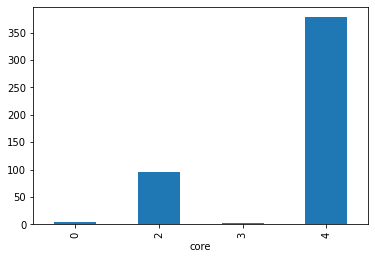

In [114]:
ge.groupby(by='core').count()['latitude'].plot(kind='bar')

In [115]:
ge=pd.read_csv('edges_Core.csv')

In [116]:
ge.sample(5)

,Source,Target,Type,ID,Weight
325,holborn,chancery-lane,Directed,325,13127
315,brent-cross,hendon-central,Directed,315,5864
936,sudbury-and-harrow-road,wembley-stadium,Directed,936,92
164,south-kensington,sloane-square,Directed,164,15183
209,harrow-and-wealdstone,watford-junction,Directed,209,552


### SubNetwork

#### LUL system

In [117]:
#Creating Subgraph for LUL subsystem
LUL_list=['LUL','LU', 'LUL/NR','LUL/DLR', 'LUL/NR/LRC', 'LUL/NR/DLR', 'LUL/LRC', 'LUL/TRAM']
LUL=Full_Transportation_Network.copy()
for edge in list(LUL.edges):
    u=edge[0]
    v=edge[1]
    check=False
    for system in LUL_list:
        if system in LUL[u][v]['subsystem']:
            check=True
            break
    if check==False:
        LUL.remove_edge(u,v)

In [118]:
print( 'Network Reciprocity:' ,nx.reciprocity(LUL))
print( 'The number of the node:', len(LUL.nodes()))
print( 'The number of the edges:', len(LUL.edges()))
print( 'Is the network directed?', LUL.is_directed())

Network Reciprocity: 0.9749351771823682
The number of the node: 481
The number of the edges: 1157
Is the network directed? True


#### NR system

In [119]:
#Creating Subgraph for LUL subsystem
NR_list=['NR', 'LUL/NR', 'LUL/NR/LRC', 'NR/LRC', 'LUL/NR/DLR', 'NR/DLR']
NR=Full_Transportation_Network.copy()
for edge in list(NR.edges):
    u=edge[0]
    v=edge[1]
    check=False
    for system in NR_list:
        if system in NR[u][v]['subsystem']:
            check=True
            break
    if check==False:
        NR.remove_edge(u,v)

In [120]:
print( 'Network Reciprocity:' ,nx.reciprocity(NR))
print( 'The number of the node:', len(NR.nodes()))
print( 'The number of the edges:', len(NR.edges()))
print( 'Is the network directed?', NR.is_directed())

Network Reciprocity: 0.9875104079933389
The number of the node: 481
The number of the edges: 1201
Is the network directed? True


#### DLR system

In [121]:
#Creating Subgraph for LUL subsystem
DR_list=['DR', 'DLR', 'LUL/DLR', 'DLR', 'LUL/NR/DLR', 'NR/DLR', 'DLR/LRC']
DR=Full_Transportation_Network.copy()
for edge in list(DR.edges):
    u=edge[0]
    v=edge[1]
    check=False
    for system in DR_list:
        if system in DR[u][v]['subsystem']:
            check=True
            break
    if check==False:
        DR.remove_edge(u,v)

In [122]:
print( 'Network Reciprocity:' ,nx.reciprocity(DR))
print( 'The number of the node:', len(DR.nodes()))
print( 'The number of the edges:', len(DR.edges()))
print( 'Is the network directed?', DR.is_directed())

Network Reciprocity: 0.9082240762812872
The number of the node: 481
The number of the edges: 839
Is the network directed? True


#### LRC System

In [123]:
#Creating Subgraph for LUL subsystem
LRC_list=['LRC', 'LUL/NR/LRC', 'NR/LRC', 'LRC', 'LUL/LRC', 'DLR/LRC']
LRC=Full_Transportation_Network.copy()
for edge in list(LRC.edges):
    u=edge[0]
    v=edge[1]
    check=False
    for system in LRC_list:
        if system in LRC[u][v]['subsystem']:
            check=True
            break
    if check==False:
        LRC.remove_edge(u,v)

In [124]:
print( 'Network Reciprocity:' ,nx.reciprocity(LRC))
print( 'The number of the node:', len(LRC.nodes()))
print( 'The number of the edges:', len(LRC.edges()))
print( 'Is the network directed?', LRC.is_directed())

Network Reciprocity: 0.9486887115165337
The number of the node: 481
The number of the edges: 877
Is the network directed? True


# Computing the Shortest Path

In [179]:
df_safe_path=pd.DataFrame(columns=['station1', 'station2']) 

In [180]:
a=[1,2]

In [181]:
def Shortest_path(G, Place_from,Place_To,time):
     
    #time: as string in 24 hour setting. Like 14:54
    #Computing based on risk_length function
    #In the coordinate, the left is 'latitude' and the right is 'longitude'
    Coordinate_low_risk={}
    Coordinate_shortest_path={}
    df_safe_path=pd.DataFrame(columns=['station1', 'station2'])
    df_shortest_path=pd.DataFrame(columns=['station1', 'station2'])
    timecat=time_category(time)
    #weight='risk_lenght_'+timecat
    weight='risk_lenght_'+timecat # Based on 
    path_risk=nx.shortest_path(G, source=Place_from,target =Place_To, weight=weight)
    distance=0
    timelength=0
    Avgrisk=0
    source_list=[]
    target_list=[]
    risk=[]
    for idx in range(len(path_risk)-1):
        source=path_risk[idx]
        #Coordinate_low_risk[source]=(stress_death.loc[source]['latitude'],stress_death.loc[source]['longitude'])
        target=path_risk[idx+1]
        source_list.append(source)
        target_list.append(target)
        distance+=G[source][target]['dist']
        timelength+=G[source][target]['Avglength_'+timecat]
        risk.append(G[source][target]['Covid_risk_'+timecat])
        Avgrisk+=G[source][target]['Covid_risk_'+timecat]
        risk.append([source,target, G[source][target]['Covid_risk_'+timecat]])
    #Coordinate_low_risk[path_risk[-1]]=(stress_death.loc[path_risk[-1]]['latitude'],stress_death.loc[path_risk[-1]]['longitude'])
    Avgrisk=Avgrisk/(len(path_risk)-1)
    df_safe_path['station1']=source_list
    df_safe_path['station2']=target_list
    
    print('Lower risk suggested Route between', Place_from, 'and', Place_To, 'at',timecat+'.')
    print('\tRoute:', path_risk)
    print('\tNumber of Stops or Stations in-between:', len(path_risk))
    print('\tDistance:', np.round(distance,3))
    print('\tTime Length:', np.round(timelength,3))
    print('\tAverage Contamination Risk:', np.round(Avgrisk,3))
    
    #print('Risk for safe paths')
    #print(risk)
    
    #Computing based on shortest_path length (Time length)
    weight='Avglength_'+timecat
    shortest_path=nx.shortest_path(G, source=Place_from,target =Place_To, weight=weight)
    Sdistance=0
    Stimelength=0
    SAvgrisk=0
    source_list=[]
    target_list=[]
    risk=[]
    for idx in range(len(shortest_path)-1):
        source=shortest_path[idx]
        #Coordinate_shortest_path[source]=(stress_death.loc[source]['latitude'],stress_death.loc[source]['longitude'])
        target=shortest_path[idx+1]
        source_list.append(source)
        target_list.append(target)
        Sdistance+=G[source][target]['dist']
        Stimelength+=G[source][target]['Avglength_'+timecat]
        SAvgrisk+=G[source][target]['Covid_risk_'+timecat]
        risk.append([source,target, G[source][target]['Covid_risk_'+timecat]])
    #Coordinate_shortest_path[source]=(stress_death.loc[path_risk[-1]]['latitude'],stress_death.loc[path_risk[-1]]['longitude'])
    SAvgrisk=SAvgrisk/(len(shortest_path)-1)
    df_shortest_path['station1']=source_list
    df_shortest_path['station2']=target_list
    print('Shortest Route between', Place_from, 'and', Place_To, 'at',timecat+'.')
    print('\tRoute:', shortest_path)
    print('\tNumber of Stops or Stations in-between:', len(shortest_path))
    print('\tDistance:', np.round(Sdistance,3))
    print('\tTime Length:', np.round(Stimelength,3))
    print('\tAverage Contamination Risk:', np.round(SAvgrisk,3))
    
    print('Risk for shortest paths')
    #print(risk)
    details={}
    details['Low_risk_path']={'Distance':distance, 'Time_lenght':timelength, 'Average_Risk':Avgrisk, 'pairs' :df_safe_path}
    details['Shortest_path']={'Distance':Sdistance, 'Time_lenght':Stimelength, 'Average_Risk':SAvgrisk, 'pairs' :df_shortest_path}
    return details

In [182]:
details=Shortest_path(Full_Transportation_Network, 'green-park','st-johns-wood','8:00')

Lower risk suggested Route between green-park and st-johns-wood at Early Morning.
	Route: ['green-park', 'bond-street', 'baker-street', 'st-johns-wood']
	Number of Stops or Stations in-between: 4
	Distance: 3.844
	Time Length: 12.112
	Average Contamination Risk: 245.34
Shortest Route between green-park and st-johns-wood at Early Morning.
	Route: ['green-park', 'bond-street', 'baker-street', 'st-johns-wood']
	Number of Stops or Stations in-between: 4
	Distance: 3.844
	Time Length: 12.112
	Average Contamination Risk: 245.34
Risk for shortest paths


In [161]:
details=Shortest_path(Full_Transportation_Network, 'green-park','st-johns-wood','21:00')

Lower risk suggested Route between green-park and st-johns-wood at Evening.
	Route: ['green-park', 'oxford-circus', 'regents-park', 'baker-street', 'st-johns-wood']
	Number of Stops or Stations in-between: 5
	Distance: 4.52
	Time Length: 14.596
	Average Contamination Risk: 204.011
Shortest Route between green-park and st-johns-wood at Evening.
	Route: ['green-park', 'bond-street', 'baker-street', 'st-johns-wood']
	Number of Stops or Stations in-between: 4
	Distance: 3.844
	Time Length: 12.107
	Average Contamination Risk: 439.714
Risk for shortest paths


# Edge Flow at each time

In [137]:
def edge_flow(G):
    edges_flow_per_time={}
    part_day=['Early Morning','Morning','Late Morning','Early Afternoon','Afternoon','Late Afternoon','Early Evening','Evening','Late Evening','Mid night']
    c=0
    for timecat in part_day:
        for source_from in G: 
            #if c==10:
                #break
            c+=1

            weight='risk_lenght_'+timecat
            day_stress='Stress_'+timecat
            allpath=nx.shortest_path(G, source=source_from, weight=weight)
            #destinations=set(G.nodes)-set(source)
            for dest in allpath:
                if True:  
                    shortest_path=allpath[dest]
                    for idx in range(len(shortest_path)-1):
                        source=shortest_path[idx]
                        target=shortest_path[idx+1]
                        if (source,target) not in edges_flow_per_time:
                            #edges_flow_per_time[(source,target)]={'Early Morning':0,'Morning':0,'Late Morning':0,'Early Afternoon':0,'Afternoon':0,
                                                                  #'Late Afternoon':0,'Early Evening':0,'Evening':0,'Late Evening':0,'Mid night':0}
                            edges_flow_per_time[(source,target)]={}
                        if day_stress not in edges_flow_per_time[(source,target)]:
                            #print(source,target)
                            edges_flow_per_time[(source,target)][day_stress]=G[source][target][day_stress]
                        else:
                            #print(source_from,dest)
                            edges_flow_per_time[(source,target)][day_stress]+=G[source][target][day_stress]
                else:
                    continue
                
    return edges_flow_per_time

In [138]:
flow=edge_flow(Full_Transportation_Network)

In [139]:
flow

{('acton-central', 'willesden-junction'): {'Stress_Early Morning': 2532914,
  'Stress_Morning': 2669787,
  'Stress_Late Morning': 327267,
  'Stress_Early Afternoon': 1431360,
  'Stress_Afternoon': 744236,
  'Stress_Late Afternoon': 986328,
  'Stress_Early Evening': 2880276,
  'Stress_Evening': 1087450,
  'Stress_Late Evening': 564203,
  'Stress_Mid night': 65555.60000000065},
 ('acton-central', 'south-acton'): {'Stress_Early Morning': 4489002,
  'Stress_Morning': 9030246,
  'Stress_Late Morning': 1050707,
  'Stress_Early Afternoon': 2196096,
  'Stress_Afternoon': 1283054,
  'Stress_Late Afternoon': 1345480,
  'Stress_Early Evening': 3886904,
  'Stress_Evening': 1955520,
  'Stress_Late Evening': 1017768,
  'Stress_Mid night': 88.1},
 ('willesden-junction', 'kensal-green'): {'Stress_Early Morning': 499896,
  'Stress_Morning': 447888,
  'Stress_Late Morning': 112443,
  'Stress_Early Afternoon': 510645,
  'Stress_Afternoon': 207758,
  'Stress_Late Afternoon': 902877,
  'Stress_Early Evenin

In [206]:
len(flow)

1217

In [122]:
p=[len(c) for c in sorted(nx.strongly_connected_components_recursive(Full_Transportation_Network),
...                         key=len, reverse=True)]

In [123]:
p

[474, 1, 1, 1, 1, 1]

In [214]:
Full_Transportation_Network['ickenham'][ 'ruislip']['trip_no']

1174

In [179]:
path_risk=nx.shortest_path(Full_Transportation_Network, source='tottenham-court-road', weight='Stress_Morning')

In [166]:
path_risk

{'tottenham-court-road': ['tottenham-court-road'],
 'bond-street': ['tottenham-court-road',
  'oxford-circus',
  'regents-park',
  'baker-street',
  'bond-street'],
 'goodge-street': ['tottenham-court-road', 'goodge-street'],
 'oxford-circus': ['tottenham-court-road', 'oxford-circus'],
 'holborn': ['tottenham-court-road', 'holborn'],
 'leicester-square': ['tottenham-court-road', 'leicester-square'],
 'farringdon': ['tottenham-court-road', 'farringdon'],
 'green-park': ['tottenham-court-road', 'oxford-circus', 'green-park'],
 'warren-street': ['tottenham-court-road', 'goodge-street', 'warren-street'],
 'piccadilly-circus': ['tottenham-court-road',
  'leicester-square',
  'piccadilly-circus'],
 'regents-park': ['tottenham-court-road', 'oxford-circus', 'regents-park'],
 'covent-garden': ['tottenham-court-road', 'holborn', 'covent-garden'],
 'russell-square': ['tottenham-court-road', 'holborn', 'russell-square'],
 'chancery-lane': ['tottenham-court-road', 'holborn', 'chancery-lane'],
 'bak

In [200]:
Full_Transportation_Network['kensal-green']['queens-park']['subsystem']

{'DLR',
 'LRC',
 'LUL',
 'LUL/LRC',
 'LUL/NR',
 'LUL/NR/LRC',
 'N',
 'NR',
 'NR/DLR',
 'NR/LRC',
 'R'}

In [ ]:
def dijkstra(self, source, dest):
        assert source in self.vertices, 'Such source node doesn\'t exist'

        # 1. Mark all nodes unvisited and store them.
        # 2. Set the distance to zero for our initial node 
        # and to infinity for other nodes.
        distances = {vertex: inf for vertex in self.vertices}
        previous_vertices = {
            vertex: None for vertex in self.vertices
        }
        distances[source] = 0
        vertices = self.vertices.copy()

        while vertices:
            # 3. Select the unvisited node with the smallest distance, 
            # it's current node now.
            current_vertex = min(
                vertices, key=lambda vertex: distances[vertex])

            # 6. Stop, if the smallest distance 
            # among the unvisited nodes is infinity.
            if distances[current_vertex] == inf:
                break

            # 4. Find unvisited neighbors for the current node 
            # and calculate their distances through the current node.
            for neighbour, cost in self.neighbours[current_vertex]:
                alternative_route = distances[current_vertex] + cost

                # Compare the newly calculated distance to the assigned 
                # and save the smaller one.
                if alternative_route < distances[neighbour]:
                    distances[neighbour] = alternative_route
                    previous_vertices[neighbour] = current_vertex

            # 5. Mark the current node as visited 
            # and remove it from the unvisited set.
            vertices.remove(current_vertex)


        path, current_vertex = deque(), dest
        while previous_vertices[current_vertex] is not None:
            path.appendleft(current_vertex)
            current_vertex = previous_vertices[current_vertex]
        if path:
            path.appendleft(current_vertex)
        return path

# Nash Equilibria

In [257]:
pathes={}
for i in range(600):
    w='Stress_Late Afternoon'
    path=nx.shortest_path(Full_Transportation_Network, source='green-park',target ='st-johns-wood', weight=w)
    if tuple(path) not in pathes:
        pathes[tuple(path)]=1
    else:
        pathes[tuple(path)]+=1
    for idx in range(len(path)-1):
        source=path[idx]
        target=path[idx+1]
        Full_Transportation_Network[source][target]['Stress_Late Afternoon']+=1

In [258]:
sum(list(pathes.values()))

600

In [259]:
len(pathes)

9

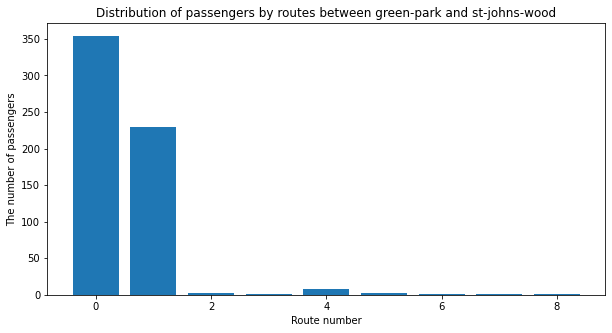

In [260]:
plt.figure(figsize=(10,5))
plt.bar(([i for i in range(len(pathes))]),list(pathes.values()))
plt.title('Distribution of passengers by routes between green-park and st-johns-wood')
plt.xlabel('Route number')
plt.ylabel('The number of passengers')
plt.savefig('passangerDist.png')

In [261]:
pathes

{('green-park',
  'oxford-circus',
  'regents-park',
  'baker-street',
  'st-johns-wood'): 354,
 ('green-park', 'bond-street', 'baker-street', 'st-johns-wood'): 229,
 ('green-park',
  'victoria',
  'denmark-hill',
  'peckham-rye',
  'queens-road-peckham',
  'surrey-quays',
  'new-cross-gate',
  'brockley',
  'honor-oak-park',
  'forest-hill',
  'sydenham',
  'crystal-palace',
  'gipsy-hill',
  'west-norwood',
  'streatham-hill',
  'balham',
  'tooting',
  'haydons-road',
  'wimbledon',
  'earlsfield',
  'clapham-junction',
  'imperial-wharf',
  'west-brompton',
  'kensington-olympia',
  'shepherds-bush',
  'willesden-junction',
  'kensal-rise',
  'brondesbury-park',
  'brondesbury',
  'west-hampstead',
  'finchley-road',
  'swiss-cottage',
  'st-johns-wood'): 3,
 ('green-park',
  'victoria',
  'denmark-hill',
  'peckham-rye',
  'nunhead',
  'lewisham',
  'ladywell',
  'catford-bridge',
  'lower-sydenham',
  'new-beckenham',
  'clock-house',
  'elmers-end',
  'arena',
  'harrington-road

In [268]:
alldata=[]
for path in pathes:
        df=pd.DataFrame(columns=['station1', 'station2','stress'])
        p=path
        left=[]
        right=[]
        for idx in range(len(p)-1):
            source=path[idx]
            target=path[idx+1]
            left.append(source)
            right.append(target)
        df['station1']=left
        df['station2']=right
        df['stress']=pathes[path]
        alldata.append(df)

In [269]:
alldata

[        station1       station2  stress
 0     green-park  oxford-circus     354
 1  oxford-circus   regents-park     354
 2   regents-park   baker-street     354
 3   baker-street  st-johns-wood     354,
        station1       station2  stress
 0    green-park    bond-street     229
 1   bond-street   baker-street     229
 2  baker-street  st-johns-wood     229,
                station1             station2  stress
 0            green-park             victoria       3
 1              victoria         denmark-hill       3
 2          denmark-hill          peckham-rye       3
 3           peckham-rye  queens-road-peckham       3
 4   queens-road-peckham         surrey-quays       3
 5          surrey-quays       new-cross-gate       3
 6        new-cross-gate             brockley       3
 7              brockley       honor-oak-park       3
 8        honor-oak-park          forest-hill       3
 9           forest-hill             sydenham       3
 10             sydenham       crystal-

In [270]:
import pickle
  
with open('path.directed', 'wb') as network_file:
    pickle.dump(alldata, network_file)

In [271]:
import pickle
with open('path.directed', 'rb') as network_file:
 
    alldata = pickle.load(network_file)
 

In [272]:
alldata

[        station1       station2  stress
 0     green-park  oxford-circus     354
 1  oxford-circus   regents-park     354
 2   regents-park   baker-street     354
 3   baker-street  st-johns-wood     354,
        station1       station2  stress
 0    green-park    bond-street     229
 1   bond-street   baker-street     229
 2  baker-street  st-johns-wood     229,
                station1             station2  stress
 0            green-park             victoria       3
 1              victoria         denmark-hill       3
 2          denmark-hill          peckham-rye       3
 3           peckham-rye  queens-road-peckham       3
 4   queens-road-peckham         surrey-quays       3
 5          surrey-quays       new-cross-gate       3
 6        new-cross-gate             brockley       3
 7              brockley       honor-oak-park       3
 8        honor-oak-park          forest-hill       3
 9           forest-hill             sydenham       3
 10             sydenham       crystal-